In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

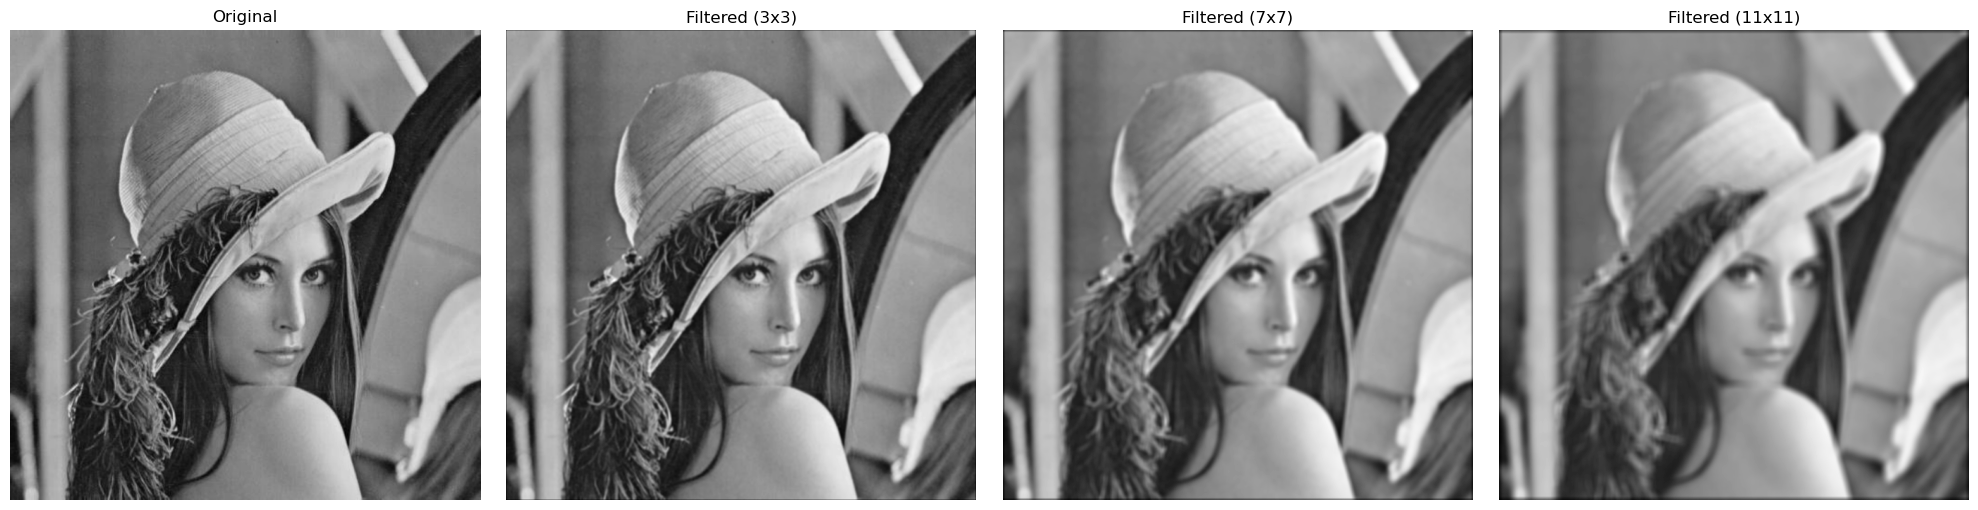

In [5]:
img = cv2.imread('./files/lena.png', cv2.IMREAD_GRAYSCALE)

def apply_filter(img, kernel):
    i_height, i_width = img.shape
    k_height, k_width = kernel.shape
    
    result_img = np.zeros_like(img)
    
    k_center_y, k_center_x = k_height // 2, k_width // 2
    
    for i in range(i_height):
        for j in range(i_width):
            convolution_sum = 0
            
            for m in range(k_height):
                for n in range(k_width):
                    y = i + m - k_center_y
                    x = j + n - k_center_x
                    
                    if (y >= 0 and y < i_height and x >= 0 and x < i_width):
                        convolution_sum += img[y, x] * kernel[m, n]
            result_img[i, j] = convolution_sum
    
    return result_img

kernels = {
    "3x3": np.ones((3, 3), np.float32) / 9,
    "7x7": np.ones((7, 7), np.float32) / 49,
    "11x11": np.ones((11, 11), np.float32) / 121
}

fig, axes = plt.subplots(1, 4, figsize=(20, 5))
axes = axes.flatten()
axes[0].imshow(img, cmap='gray'), axes[0].axis('off'), axes[0].set_title('Original')

for ax, (label, kernel) in zip(axes[1:], kernels.items()):
    filtered_img = apply_filter(img, kernel)
    ax.imshow(filtered_img, cmap='gray'), ax.axis('off'), ax.set_title(f'Filtered ({label})')

plt.tight_layout()
plt.show()

149 220


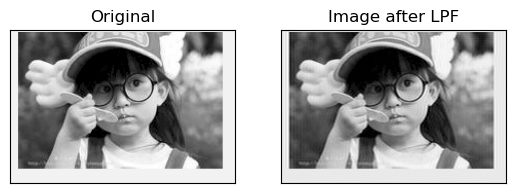

In [3]:
# 实现低通滤波
img = cv2.imread('./files/test.png', 0)
i = 70

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

rows, cols = img.shape
print(rows, cols)
crow, ccol = int(rows/2), int(cols/2)   # 需强制转换为整数
fshift[0:crow-i, 0:cols] = 0
fshift[crow+i:rows, 0:cols] = 0
fshift[crow-i:crow+i, 0:ccol-i] = 0
fshift[crow-i:crow+i, ccol+i:cols] = 0

f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.subplot(121), plt.imshow(img, cmap='gray'), plt.title('Original')
plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(img_back, cmap='gray'), plt.title('Image after LPF')
plt.xticks([]), plt.yticks([])

plt.show()

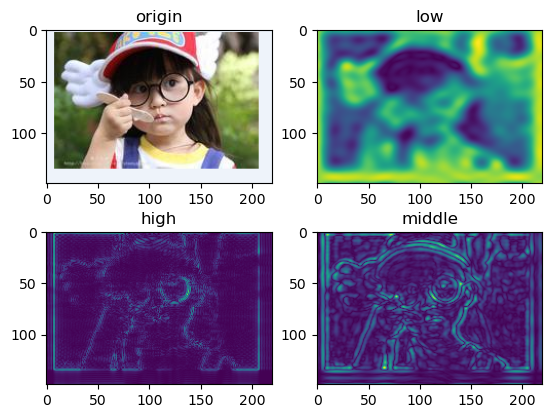

In [4]:
img = cv2.imread('./files/test.png', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.subplot(221), plt.imshow(img, 'gray'), plt.title('origin')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)   #转换成灰度图片

dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)  #进行傅里叶变化 
#参数说明:img表示输入的图片， cv2.DFT_COMPLEX_OUTPUT表示进行傅里叶变化的方法

fshift = np.fft.fftshift(dft) #将图像中的低频部分移动到图像的中心
rows, cols = img.shape
crow, ccol = int(rows / 2), int(cols / 2)
# 低通滤波器R
mask1 = np.zeros((rows, cols, 2), np.uint8)  #返回来一个给定形状和类型的用0填充的数组；
mask1[crow - 10:crow + 10, ccol - 10:ccol + 10] = 1
# 高通滤波器B
mask2 = np.ones((rows, cols, 2), np.uint8)   #返回一个全1的n维数组
mask2[crow - 40:crow + 40, ccol - 40:ccol + 40] = 0
# 带通滤波器G
mask3 = np.zeros((rows, cols, 2), np.uint8)
mask3[crow - 40:crow + 40, ccol -40:ccol + 40] = 1
mask3[crow - 10:crow + 10, ccol - 10:ccol + 10] = 0
# 掩膜图像和频谱图像乘积
f1 = fshift * mask1
f2 = fshift * mask2
f3 = fshift * mask3

ishift1 = np.fft.ifftshift(f1) #图像的低频和高频部分移动到图像原来的位置
iimg1 = cv2.idft(ishift1)   #傅里叶逆变换
res1 = cv2.magnitude(iimg1[:, :, 0], iimg1[:, :, 1])  #将sqrt(x^2 + y^2) 计算矩阵维度的平方根
ishift2 = np.fft.ifftshift(f2)
iimg2 = cv2.idft(ishift2)
res2 = cv2.magnitude(iimg2[:, :, 0], iimg2[:, :, 1])
ishift3 = np.fft.ifftshift(f3)
iimg3 = cv2.idft(ishift3)
res3 = cv2.magnitude(iimg3[:, :, 0], iimg3[:, :, 1])
res = cv2.merge([res2, res3, res1])   #通道合并

plt.subplot(222), plt.imshow(res1), plt.title('low')
plt.subplot(223), plt.imshow(res2), plt.title('high')
plt.subplot(224), plt.imshow(res3), plt.title('middle')
plt.show()

